In [95]:
import numpy as np 
import pandas as pd
from plotnine import *

In [96]:
avocados= pd.read_csv(r"/Users/alexandra/Desktop/GSB-544/Labs/Lab 2/avocado-updated-2020.csv")
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [97]:
print(avocados["geography"].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville' 'Miami/Ft. Lauderdale'
 'Midsouth' 'Nashville' 'New Orleans/Mobile' 'New York' 'Northeast'
 'Northern New England' 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh'
 'Plains' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central' 'Southeast'
 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West' 'West Tex/New Mexico']
['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton

In [98]:
region_map = {
    'Albany': 'Northeast',
    'Atlanta': 'Southeast',
    'Baltimore/Washington': 'Northeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'California': 'West',
    'Charlotte': 'Southeast',
    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Dallas/Ft. Worth': 'South Central',
    'Denver': 'West',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest',
    'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Houston': 'South Central',
    'Indianapolis': 'Midwest',
    'Jacksonville': 'Southeast',
    'Las Vegas': 'West',
    'Los Angeles': 'West',
    'Louisville': 'Midwest',
    'Miami/Ft. Lauderdale': 'Southeast',
    'Midsouth': 'Southeast',
    'Nashville': 'Southeast',
    'New Orleans/Mobile': 'South Central',
    'New York': 'Northeast',
    'Northeast': 'Northeast',
    'Northern New England': 'Northeast',
    'Orlando': 'Southeast',
    'Philadelphia': 'Northeast',
    'Phoenix/Tucson': 'West',
    'Pittsburgh': 'Northeast',
    'Plains': 'Midwest',
    'Portland': 'West',
    'Raleigh/Greensboro': 'Southeast',
    'Richmond/Norfolk': 'Southeast',
    'Roanoke': 'Southeast',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'South Carolina': 'Southeast',
    'South Central': 'South Central',
    'Southeast': 'Southeast',
    'Spokane': 'West',
    'St. Louis': 'Midwest',
    'Syracuse': 'Northeast',
    'Tampa': 'Southeast',
    'West': 'West',
    'West Tex/New Mexico': 'West'
}
#used chat gpt to sort and map the data
metro_regions = [
    'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
    'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 
    'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids',
    'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis', 
    'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 
    'Nashville', 'New Orleans/Mobile', 'New York', 'Orlando', 'Philadelphia', 
    'Phoenix/Tucson', 'Pittsburgh', 'Portland', 'Raleigh/Greensboro', 
    'Richmond/Norfolk', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 
    'Spokane', 'St. Louis', 'Syracuse', 'Tampa'
]

avocados['major_regions'] = avocados['geography'].map(region_map)
avocados['metro_regions'] = avocados['geography'].apply(lambda x: x if x in metro_regions else None)

avocados['Total U.S.'] = 'Total U.S.'    


In [99]:
#clean avocado data
avocados = avocados.rename(columns={'4046': 'Small', '4225': 'Large', '4770':'Xlarge'})



Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [100]:
#3

avocados_2017_organic_major = avocados[
    (avocados['year'] == 2017) & 
    (avocados['type'] == 'organic')
]

# #find region 
region_sales = avocados_2017_organic_major.groupby('major_regions')['Small'].sum()
print(region_sales)
# #highest sales
max_sales_region = region_sales.idxmax()
max_sales_value = region_sales.max()

print(max_sales_region)
print(max_sales_value)


major_regions
Midwest           514326.90
Northeast        1851396.32
South Central    2599763.26
Southeast         731730.31
West             5826061.33
Name: Small, dtype: float64
West
5826061.33
major_regions
Midwest           514326.90
Northeast        1851396.32
South Central    2599763.26
Southeast         731730.31
West             5826061.33
Name: Small, dtype: float64
West
5826061.33


The region that has the most sales of small Hass avocados is West.

**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [101]:
avocados['date'] = pd.to_datetime(avocados['date'])

avocados['month'] = avocados['date'].dt.month
avocados['day'] = avocados['date'].dt.day
avocados['year'] = avocados['date'].dt.year

monthly_sales = avocados.groupby('month')['total_volume'].sum()
print(monthly_sales)
# #highest sales
max_sales_month = monthly_sales.idxmax()
max_sales_month_value = monthly_sales.max()

print(max_sales_month)
print(max_sales_month_value)

month
1     2.873170e+09
2     2.839209e+09
3     2.903505e+09
4     2.854561e+09
5     3.276512e+09
6     2.836263e+09
7     2.867210e+09
8     2.667389e+09
9     2.545388e+09
10    2.371879e+09
11    2.309150e+09
12    1.656530e+09
Name: total_volume, dtype: float64
5
3276511653.3
month
1     2.873170e+09
2     2.839209e+09
3     2.903505e+09
4     2.854561e+09
5     3.276512e+09
6     2.836263e+09
7     2.867210e+09
8     2.667389e+09
9     2.545388e+09
10    2.371879e+09
11    2.309150e+09
12    1.656530e+09
Name: total_volume, dtype: float64
5
3276511653.3


The highest volume of sales is in May, month 5. 

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

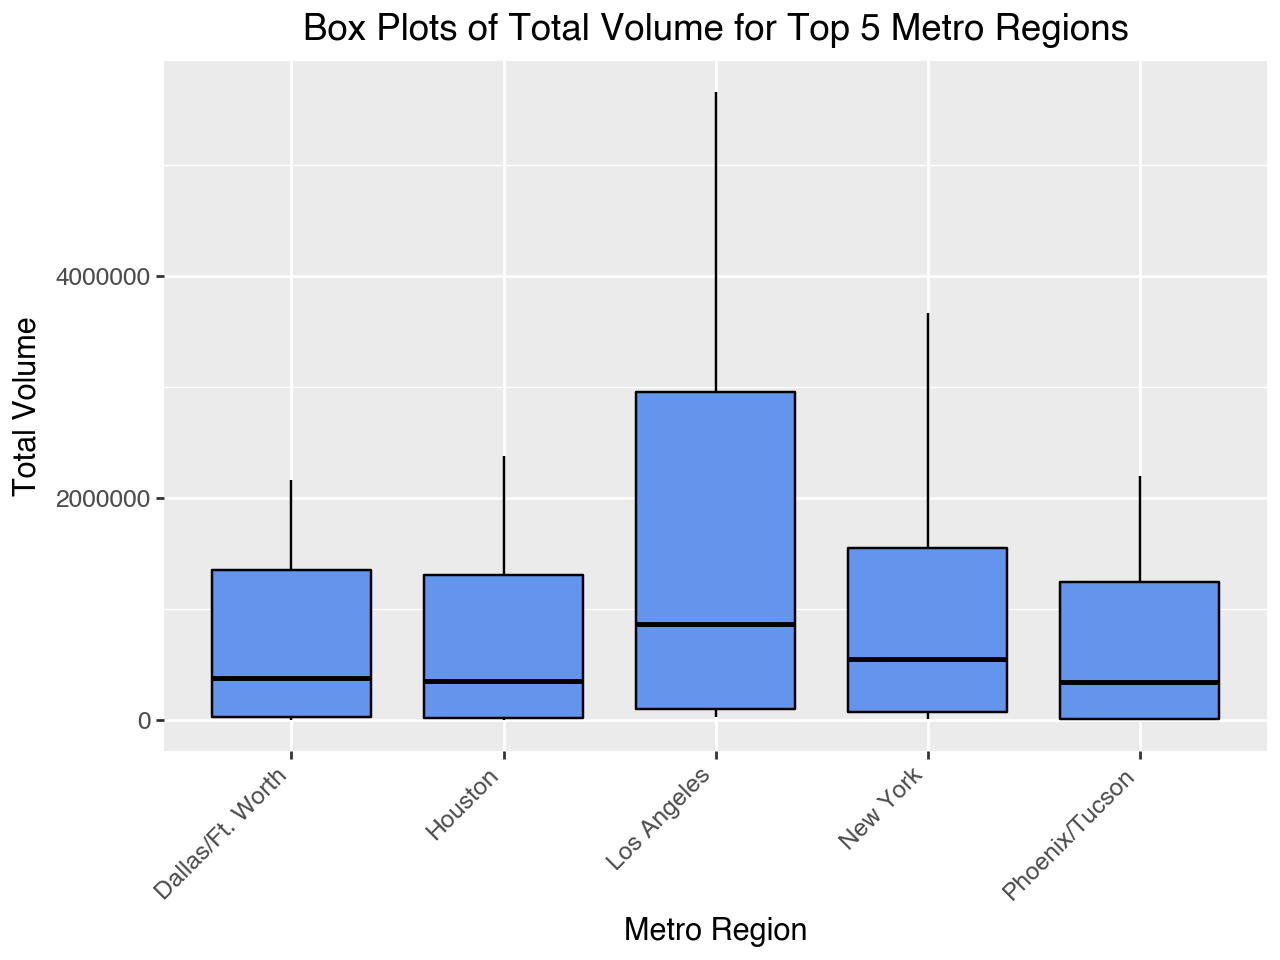

In [102]:
avg_volume_per_metro = avocados.groupby('metro_regions')['total_volume'].mean()

# top five metro areas with the highest averages
top_five_metros = avg_volume_per_metro.nlargest(5).index

#filter the original df for these top 5 metro areas
filtered_avocados = avocados[avocados['metro_regions'].isin(top_five_metros)]

#  box plots 
(
    ggplot(filtered_avocados, aes(x='metro_regions', y='total_volume'))
    + geom_boxplot(fill='cornflowerblue', color='black')
    + labs(title='Box Plots of Total Volume for Top 5 Metro Regions',
           x='Metro Region',
           y='Total Volume')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
#Chat gpt helped  with the themes  and labeling of the plot



**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

In [103]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

california = avocados[
    (avocados['metro_regions'].isin(california_regions)) & 
    (avocados['type'].isin(['organic', 'conventional']))
].copy()
california.head()

,date,average_price,total_volume,Small,Large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,major_regions,metro_regions,Total U.S.,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,Los Angeles,Total U.S.,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,Los Angeles,Total U.S.,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,Sacramento,Total U.S.,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,Sacramento,Total U.S.,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,San Diego,Total U.S.,1,4


**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

In [104]:
#Summary stats
diff = pd.DataFrame(california.groupby(['geography', 'type']) [ 'average_price'].mean()).unstack(level='type')
diff['difference'] = diff['average_price']['organic']- diff['average_price']['conventional']

diff

average_price           difference
type           conventional   organic           
geography                                       
Los Angeles        1.047124  1.574902   0.527778
Sacramento         1.295359  1.873856   0.578497
San Diego          1.113856  1.798366   0.684510
San Francisco      1.400490  2.119444   0.718954

In [105]:
california.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
Small                   float64
Large                   float64
Xlarge                  float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int32
geography                object
major_regions            object
metro_regions            object
Total U.S.               object
month                     int32
day                       int32
dtype: object

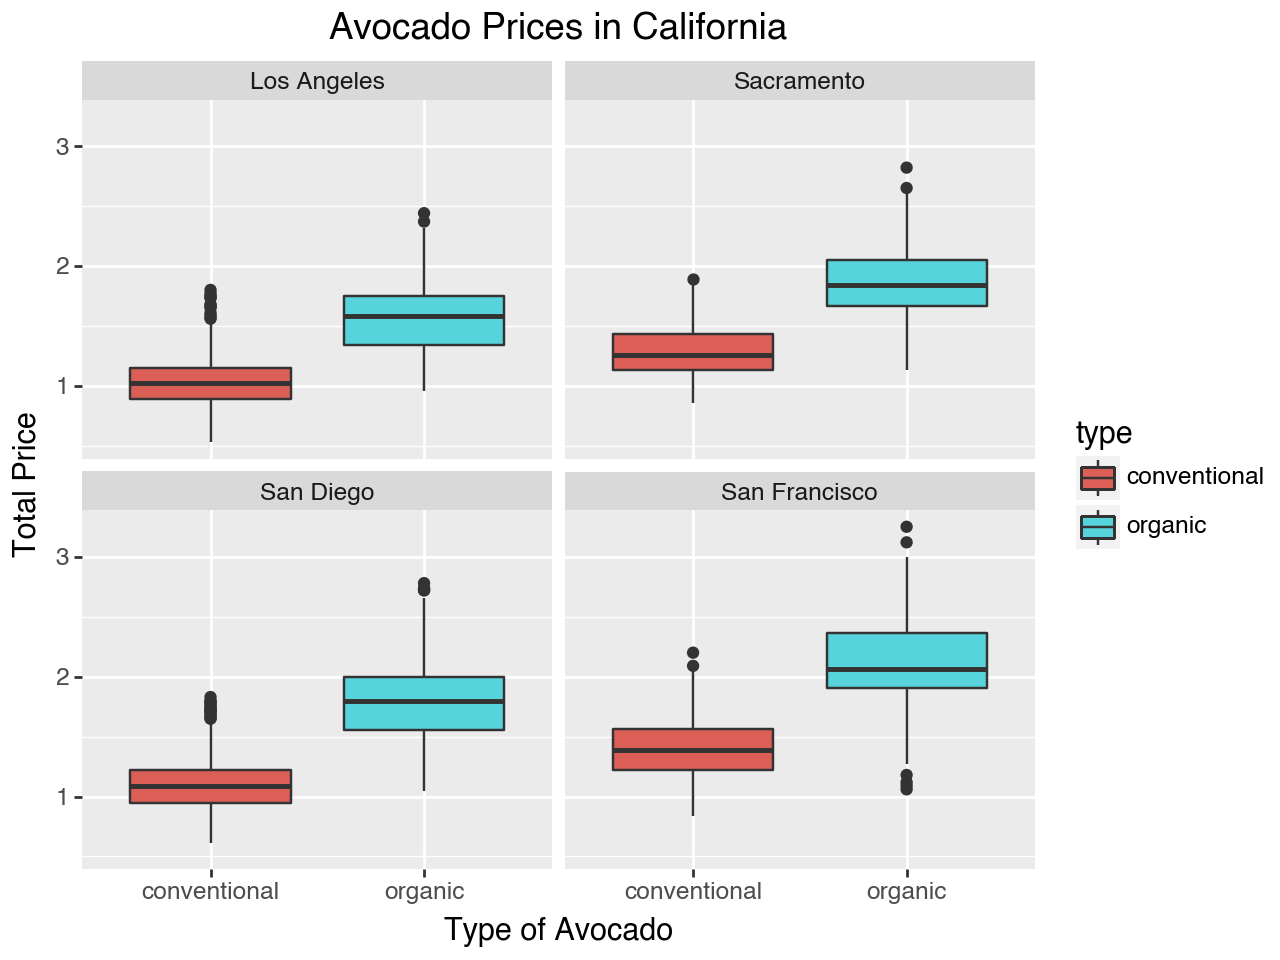

In [106]:
#graph

(
ggplot(california, aes(x='type', y='average_price', fill = 'type'))
+geom_boxplot()
+labs(title='Avocado Prices in California',
    x='Type of Avocado',
    y='Total Price')
+facet_wrap('geography')
)


**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

In [107]:
california.head()

,date,average_price,total_volume,Small,Large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,major_regions,metro_regions,Total U.S.,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,Los Angeles,Total U.S.,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,Los Angeles,Total U.S.,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,Sacramento,Total U.S.,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,Sacramento,Total U.S.,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,San Diego,Total U.S.,1,4


In [108]:
#find proportions of avocado sizes
#total
california['total_avocados'] = california['Small'] +california['Large'] + california['Xlarge']
#small, large, xl
california['small_prop'] = california['Small']/california['total_avocados']
california['large_prop'] = california['Large']/california['total_avocados']
california['xl_prop'] = california['Xlarge']/california['total_avocados']


In [109]:
avo_prop = california.groupby(['type', 'geography']).agg({
"small_prop" : "mean",
"large_prop" : "mean",
"xl_prop": "mean"
}).reset_index()


In [110]:
# melt the df to get it in a long format for ggplot
avo_prop_melt = avo_prop.melt(id_vars=['type', 'geography'], 
                              value_vars=['small_prop', 'large_prop', 'xl_prop'], 
                              var_name='variable', value_name='avo_prop')
avo_prop_melt
#used chat gpt for better formatting 

,type,geography,variable,avo_prop
0,conventional,Los Angeles,small_prop,0.687249
1,conventional,Sacramento,small_prop,0.364124
2,conventional,San Diego,small_prop,0.521771
3,conventional,San Francisco,small_prop,0.327104
4,organic,Los Angeles,small_prop,0.455542
5,organic,Sacramento,small_prop,0.393928
6,organic,San Diego,small_prop,0.282535
7,organic,San Francisco,small_prop,0.419988
8,conventional,Los Angeles,large_prop,0.249418
9,conventional,Sacramento,large_prop,0.619432


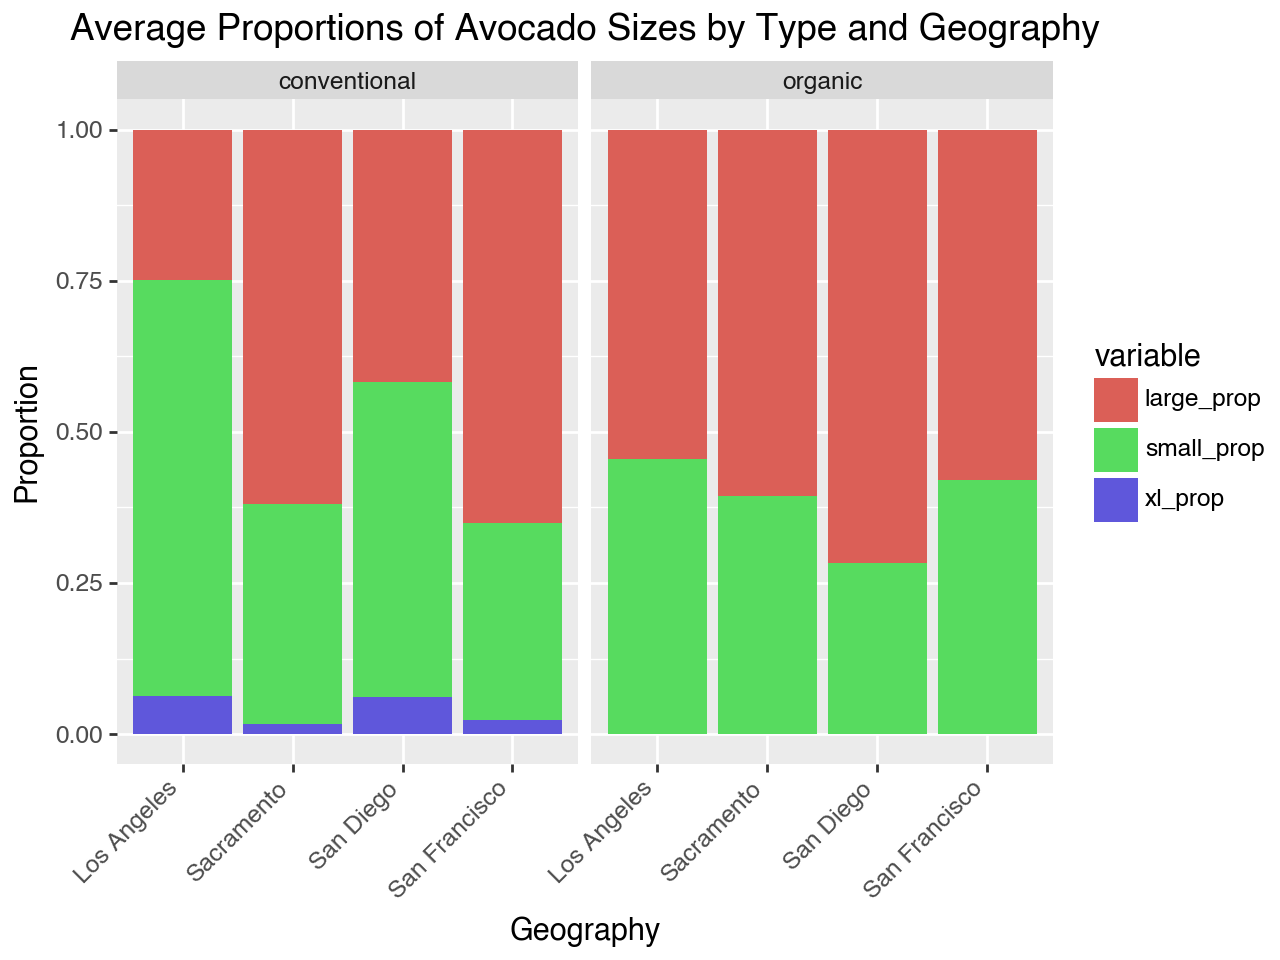

In [111]:
#plot data
(
    ggplot(avo_prop_melt, aes(x='geography', y='avo_prop', fill='variable')) +
    geom_bar(stat='identity') +
    labs(
        title='Average Proportions of Avocado Sizes by Type and Geography',
        x='Geography',
        y='Proportion'
    ) +facet_wrap('type')
    +theme(axis_text_x=element_text(rotation=45, ha='right'))
    #used chat gpt to make the labels not overlap
)



In [112]:
#create new data frame for average house prices in the four california regions for years 2015-2020
#I asked chat gpt for this information with the prompt: "What were the median house prices in the cities Sacramento, San Francisco, San Diego and Los Angeles through the years 2015-2020, give me in list form"
#It cited the dated from the LA Almanac
house_prices = pd.DataFrame({
    'geography': ['Los Angeles'] * 6 + ['San Francisco'] * 6 + ['San Diego'] * 6 + ['Sacramento'] * 6,
    'year': [2015, 2016, 2017, 2018, 2019, 2020] * 4,
   'house_price': [
    502750, 522520, 577690, 588140, 641340, 660000,  # Los Angeles
    1100000, 1200000, 1250000, 1380000, 1400000, 1450000,  # San Francisco
    530000, 568000, 605000, 618500, 655000, 730000,  # San Diego
    277500, 300000, 335000, 375000, 400000, 425000  # Sacramento
]
})

Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

**Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.**

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [113]:
#filter california data
california_avo = california.groupby(['year', 'geography']).agg(mean_total_volume=('total_volume', 'mean')).reset_index()

In [114]:
california_avo.columns

Index(['year', 'geography', 'mean_total_volume'], dtype='object')

california_avo

In [116]:
#merge data
merge_data = california_avo.merge(house_prices, on=['year', 'geography'])
merge_data.head()


,year,geography,mean_total_volume,house_price
0,2015,Los Angeles,1.425199e+06,502750
1,2015,Sacramento,2.113513e+05,277500
2,2015,San Diego,2.556320e+05,530000
3,2015,San Francisco,3.792866e+05,1100000
4,2016,Los Angeles,1.568676e+06,522520


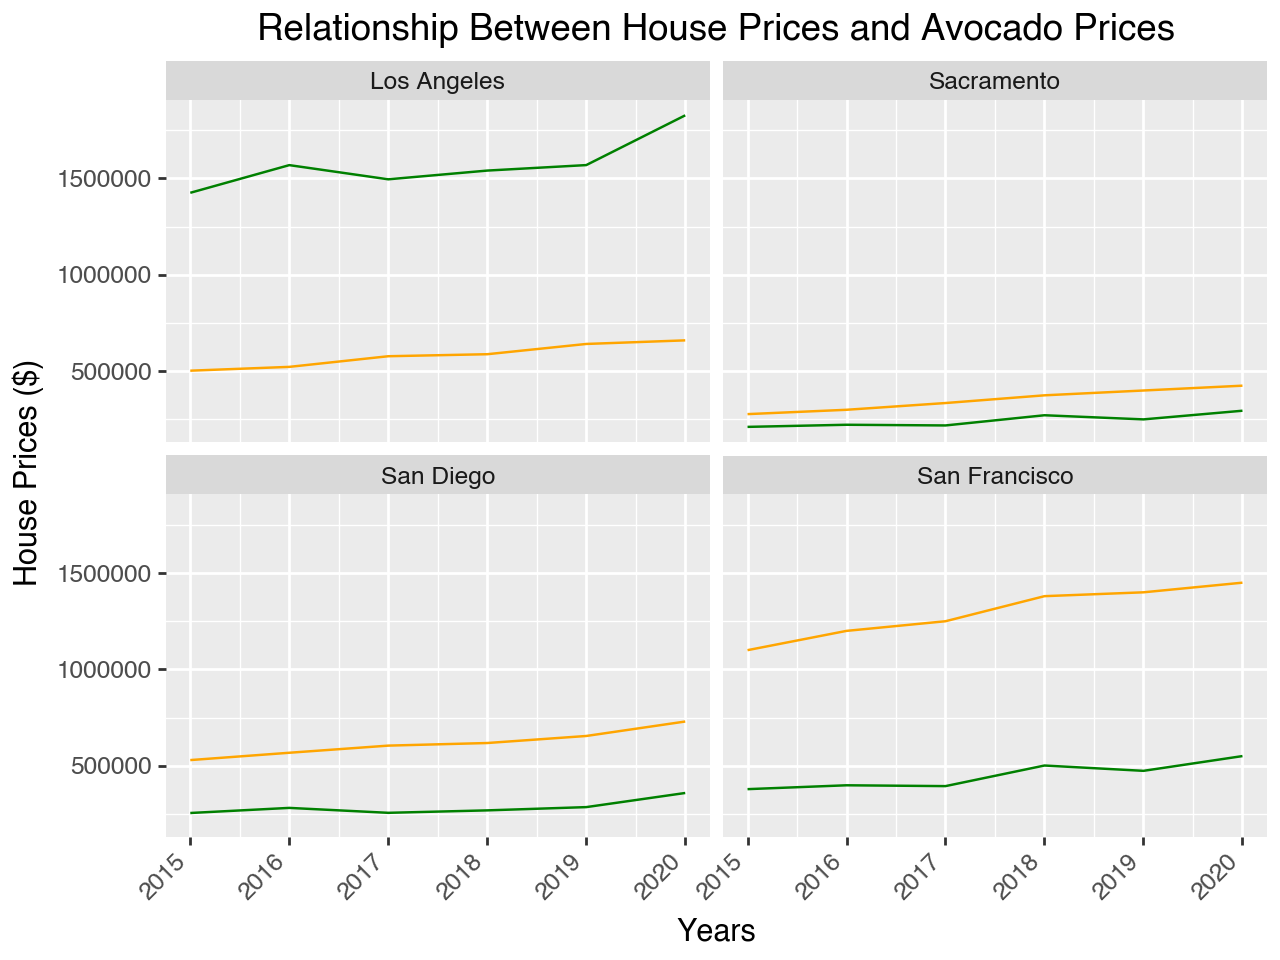

In [117]:
(ggplot(merge_data, aes(x='year'))
        + geom_line(aes(y='house_price'),color ='orange')
        + geom_line(aes(y='mean_total_volume'), color= "green")
        + labs(title='Relationship Between House Prices and Avocado Prices',
               y='House Prices ($) ',
               x='Years')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
         + facet_wrap('geography'))

There is an increase in volume of avocados bought and house prices as the years go up. However there is probably no actual correlation between these two variables.